In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
import mlflow
import mlflow.keras
import mlflow.tensorflow

plt.style.use("ggplot")

In [0]:
working_path = "dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/"

display(dbutils.fs.ls(working_path))

path,name,size
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/Features.csv,Features.csv,107657595
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/NewFeaturesFinal.csv,NewFeaturesFinal.csv,116243380
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_test_res.csv,X_test_res.csv,20106033
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_train_res-1.csv,X_train_res-1.csv,40679637
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_train_res.csv,X_train_res.csv,59024700
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_tsf_20_medium.csv,X_tsf_20_medium.csv,217685299
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_tsf_20_medium_with_index.csv,X_tsf_20_medium_with_index.csv,218615307
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_tsf_window_20.csv,X_tsf_window_20.csv,35669827
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/df_rolled.csv,df_rolled.csv,134938298
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/individual_files/,individual_files/,0


In [0]:
top50 = pd.read_csv(working_path.replace("dbfs:", "/dbfs") + "top_50_tsf_medium_w20s1.csv")
synthetic_top_50 = pd.read_csv(working_path.replace("dbfs:", "/dbfs") + "synthetic_top_50.csv")

In [0]:
rel_table = pd.read_csv(working_path.replace("dbfs:", "/dbfs") + "sorted_relevance_oversampled_w20_s1.csv")

In [0]:
synthetic_top_50.head()

Out[19]:

,platform_id,window_end,F1__has_duplicate_max,F1__last_location_of_maximum,F1__median,F1__longest_strike_above_mean,F1__root_mean_square,F1__kurtosis,F1__mean,F1__first_location_of_minimum,F1__sum_values,F1__last_location_of_minimum,F2__mean_change,F1__percentage_of_reoccurring_values_to_all_values,F1__percentage_of_reoccurring_datapoints_to_all_datapoints,F2__number_cwt_peaks__n_1,"F2__agg_autocorrelation__f_agg_""mean""__maxlag_40",F2__time_reversal_asymmetry_statistic__lag_1,F1__abs_energy,F2__minimum,F1__time_reversal_asymmetry_statistic__lag_1,F1__c3__lag_1,F1__c3__lag_2,F1__c3__lag_3,"F1__agg_autocorrelation__f_agg_""mean""__maxlag_40","F1__agg_autocorrelation__f_agg_""median""__maxlag_40",F1__ratio_value_number_to_time_series_length,F2__benford_correlation,F1__binned_entropy__max_bins_10,F1__value_count__value_0,"F1__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",F1__count_below__t_0,F2__variation_coefficient,F2__first_location_of_maximum,F1__number_cwt_peaks__n_1,F2__c3__lag_3,F2__c3__lag_2,F1__mean_change,F2__c3__lag_1,F2__binned_entropy__max_bins_10,"F2__fft_aggregated__aggtype_""centroid""","F2__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",F1__spkt_welch_density__coeff_5,F1__count_above_mean,F2__has_duplicate_min,F1__time_reversal_asymmetry_statistic__lag_3,F1__time_reversal_asymmetry_statistic__lag_2,F1__maximum,F2__number_cwt_peaks__n_5,F2__longest_strike_below_mean,F2__number_crossing_m__m_0,F1__mean_second_derivative_central,label
0,309450,24,0.0,0.809524,0.901339,6.0,0.875185,2.112501,0.870118,0.047619,18.272488,0.761905,0.000296,0.052632,0.142857,4.0,-0.077136,-1.848733e-06,16.084911,0.004693,0.021482,0.656368,0.658352,0.652279,-0.052675,-0.075841,0.904762,0.848688,1.517464,0.0,8.0,0.0,0.612558,0.047619,5.0,0.000019,0.000023,0.002421,0.000023,2.070493,2.757826,3.0,0.009941,16.0,0.0,0.004215,0.021850,0.967459,4.0,5.0,0.0,0.006907,0
1,309450,25,0.0,0.761905,0.901339,6.0,0.873560,1.943248,0.868475,0.000000,18.237972,0.714286,-0.002396,0.052632,0.142857,3.0,-0.207405,-1.186008e-06,16.025261,0.004693,0.012904,0.664980,0.654390,0.635753,-0.040212,-0.117552,0.904762,0.812764,1.580182,0.0,8.0,0.0,0.638783,0.000000,4.0,0.000017,0.000022,0.009820,0.000023,2.058461,2.859783,7.0,0.011292,15.0,0.0,0.017858,0.010111,0.967459,4.0,6.0,0.0,-0.010019,0
2,309450,26,0.0,0.714286,0.901339,6.0,0.873560,1.943248,0.868475,0.285714,18.237972,1.000000,0.002515,0.052632,0.142857,3.0,-0.071898,-4.821149e-08,16.025261,0.004693,-0.028113,0.661993,0.654143,0.637398,-0.154261,-0.094184,0.904762,0.812764,1.580182,0.0,8.0,0.0,0.638783,0.285714,4.0,0.000012,0.000018,-0.014890,0.000023,2.058461,2.859783,6.0,0.012219,15.0,0.0,-0.036637,-0.034536,0.967459,4.0,6.0,0.0,-0.004487,0
3,309450,27,0.0,0.666667,0.901339,5.0,0.872931,1.982601,0.867891,0.238095,18.225717,0.952381,-0.001244,0.052632,0.142857,3.0,-0.071806,-3.112398e-06,16.002169,0.007077,-0.020452,0.646602,0.648694,0.653331,-0.038835,-0.139628,0.904762,0.847008,1.580182,0.0,8.0,0.0,0.594665,0.238095,5.0,0.000012,0.000017,0.000682,0.000023,2.086674,2.490740,6.0,0.012501,15.0,0.0,-0.006346,-0.028065,0.967459,4.0,6.0,0.0,0.007475,0
4,309450,28,0.0,0.619048,0.899573,5.0,0.871082,1.979470,0.866107,0.190476,18.188244,0.904762,-0.001348,0.052632,0.142857,4.0,-0.098611,-4.315931e-06,15.934447,0.007077,-0.002490,0.633707,0.635282,0.647660,-0.025614,-0.128843,0.904762,0.881329,1.594982,0.0,8.0,0.0,0.612657,0.190476,4.0,0.000009,0.000015,-0.001948,0.000020,2.020660,2.565731,8.0,0.012252,15.0,0.0,-0.006081,-0.028936,0.967459,4.0,6.0,0.0,-0.001238,0


In [0]:
synthetic_top20 = synthetic_top_50[["platform_id", "window_end"] + rel_table.head(20)['feature'].tolist() + ["label"]]

In [0]:
synthetic_top20.head()

Out[21]:

,platform_id,window_end,F1__has_duplicate_max,F1__last_location_of_maximum,F1__median,F1__longest_strike_above_mean,F1__root_mean_square,F1__kurtosis,F1__mean,F1__first_location_of_minimum,F1__sum_values,F1__last_location_of_minimum,F2__mean_change,F1__percentage_of_reoccurring_values_to_all_values,F1__percentage_of_reoccurring_datapoints_to_all_datapoints,F2__number_cwt_peaks__n_1,"F2__agg_autocorrelation__f_agg_""mean""__maxlag_40",F2__time_reversal_asymmetry_statistic__lag_1,F1__abs_energy,F2__minimum,F1__time_reversal_asymmetry_statistic__lag_1,F1__c3__lag_1,label
0,309450,24,0.0,0.809524,0.901339,6.0,0.875185,2.112501,0.870118,0.047619,18.272488,0.761905,0.000296,0.052632,0.142857,4.0,-0.077136,-1.848733e-06,16.084911,0.004693,0.021482,0.656368,0
1,309450,25,0.0,0.761905,0.901339,6.0,0.873560,1.943248,0.868475,0.000000,18.237972,0.714286,-0.002396,0.052632,0.142857,3.0,-0.207405,-1.186008e-06,16.025261,0.004693,0.012904,0.664980,0
2,309450,26,0.0,0.714286,0.901339,6.0,0.873560,1.943248,0.868475,0.285714,18.237972,1.000000,0.002515,0.052632,0.142857,3.0,-0.071898,-4.821149e-08,16.025261,0.004693,-0.028113,0.661993,0
3,309450,27,0.0,0.666667,0.901339,5.0,0.872931,1.982601,0.867891,0.238095,18.225717,0.952381,-0.001244,0.052632,0.142857,3.0,-0.071806,-3.112398e-06,16.002169,0.007077,-0.020452,0.646602,0
4,309450,28,0.0,0.619048,0.899573,5.0,0.871082,1.979470,0.866107,0.190476,18.188244,0.904762,-0.001348,0.052632,0.142857,4.0,-0.098611,-4.315931e-06,15.934447,0.007077,-0.002490,0.633707,0


In [0]:
synthetic_top20.shape

Out[22]: (210504, 23)

In [0]:
synthetic_top20['label'].value_counts()

Out[23]: 1 105252
0 105252
Name: label, dtype: int64

In [0]:
# Load vehicle list and nonfailure failure set
vehicles = pd.read_csv('/dbfs/FileStore/shared_uploads/mtaruno@u.rochester.edu/vehicle_list.csv')
dpf_normal = []
dpf_failure = []

for i, e in vehicles.iterrows():
    if(e.dpf_failure == 'No'):
        dpf_normal.append(e.platform_id)
    else:
        dpf_failure.append(e.platform_id)
len(dpf_normal)

Out[14]: 69

In [0]:
vehicles.head()

Out[20]:

,fleet,truck_number,platform_id,vehicle_year,vehicle_make,vehicle_model,date_of_service,dpf_failure
0,Conway,432 3619,309450,2014,Freightliner,Cascadia,1/4/2019,Yes
1,Conway,432 3577,308374,2014,Freightliner,Cascadia,1/9/2019,Yes
2,Conway,426 6337,10315963,2013,Freightliner,Cascadia,1/17/2019,Yes
3,Conway,532 4279,10314364,2014,Freightliner,Cascadia,1/28/2019,Yes
4,Conway,432 3754,307112,2014,Freightliner,Cascadia,2/13/2019,Yes


In [0]:
## All functions for labeling and generating training/testing set

window_size = 8

def generate_windows(data, ws=window_size, scaler=StandardScaler):
    ll = len(data)
    label = data.label.tolist()
    data_copy = data.copy(deep=True)
    try:
      data_copy = data_copy.drop('window_end',axis=1)
      data_copy = data_copy.drop('label', axis=1)
    except:
      print("Window_end and label column not found in the input data")
      
    dd = scaler().fit_transform(data_copy)
    X = []
    y = []
    label_windowed = []
    
    for i in range(0, (ll - ws)):
        X.append(dd[i:i+ws])
        y.append(dd[i:i+ws])
        label_windowed.append(label[i:i+ws])
    
    return X, y, label_windowed

# this is just to generate a histogram for the 0s, 1s, and 2s.
def generate_single_labels(data, ws=window_size):
    ll = len(data)
    label = data.label.tolist()
    label_windowed = []
    for i in range(0, (ll - ws)):
        label_windowed.append(label[i:i+ws])
    
    return label_windowed

# same
def generate_labels(data, ws=window_size, failure = dpf_failure):
    labels_windowed = []
    for i in failure: # Add each truck to training data
        labels = generate_single_labels(data.loc[i,:])
        labels_windowed += labels
    label_np = [np.array(x) for x in (labels_windowed)]
    true_labels = label_window(label_np)
    return true_labels

def generate_training(data, ws=window_size, normal = dpf_normal):
    Xs = []
    Ys = []
    # Training data does not need label
    for i in normal: # Add each truck to training data
        X, y, labels = generate_windows(data.loc[i,:],ws)
        Xs += X
        Ys += y
    X_tr, X_ts, y_tr, y_ts = [np.array(x) for x in train_test_split(Xs, Ys,random_state=0)]
    return (X_tr, y_tr, X_ts, y_ts)

def generate_all_training(data, ws=window_size, normal = dpf_normal):
    Xs = []
    Ys = []
    # Training data does not need label
    for i in normal: # Add each truck to training data
        X, y, labels = generate_windows(data.loc[i,:],ws)
        Xs += X
        Ys += y
    x1, x2 = [np.array(x) for x in (Xs,Ys)]
    return (x1,x2)

def generate_testing(data, ws=window_size, failure = dpf_failure):
    '''
    return: 
        Xtr, Xts - data from the dpf_failure ones
        y_tr, y_ts - labels from the dpf_failure windows
    '''
    Xs = []
    labels_windowed = [] # testing data needs label
    for i in failure: # Add each truck to training data
        X, y, labels = generate_windows(data.loc[i,:],ws)
        Xs = Xs + X
        labels_windowed += labels
    label_np = [np.array(x) for x in (labels_windowed)]
    true_labels = label_window(label_np)
    X_updated, true_labels_updated = remove_label2(Xs,true_labels)
    
    X_tr, X_ts, y_tr, y_ts = [np.array(x) for x in train_test_split(X_updated, true_labels_updated, random_state=0)]
    #@@!! hopefully, this will distribute the correct label to the correct window after train_test_split
    
    print('last platform_id: ',i)
    return (X_tr, y_tr, X_ts, y_ts)

#@@ I don't want to test if X_updated is mapped correctly to the true_labels, but problems maybe here

def generate_all_testing(data, ws=window_size, failure = dpf_failure): # no train test split
    '''
    returns a tuple of testing data, X mapped to its label
    '''
    Xs = []
    labels_windowed = []
    for i in failure: # Add each truck to training data
        X, y, labels = generate_windows(data.loc[i,:],ws)
        Xs += X
        labels_windowed += labels
    label_np = [np.array(x) for x in (labels_windowed)]
    true_labels = label_window(label_np)
    X_updated, true_labels_updated = remove_label2(Xs,true_labels)
    
    y1, y2 = [np.array(x) for x in (X_updated,true_labels_updated)]
    return (y1,y2)
    
def generate_class(a_data, ws = window_size, failure = dpf_failure):
    ll = 0
    dpf_class = []
    
    for i in failure:
        truck_all = a_data.loc[i,:]
        ll = len(truck_all)
        
        
        for j in range(0, (ll-ws)):
#             print(i,j+ws)
#             print(truck_all['Failure'].iloc[j+ws])
            
            if(truck_all['Failure'].iloc[j+ws]==1):
                dpf_class.append(1)
            else:
                dpf_class.append(0)
                
    return dpf_class
def extract_raw(data):
    frames = []
    for i, e in vehicles.iterrows():
        tmp = data[data['platform_id']==e.platform_id]
        try: 
            del tmp['Unnamed: 0']
        except:
            None
        frames.append(tmp)
        
    data_all = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist()) # The order of the vehicle.platform_id is the same as tmp's
    return data_all

def extract_trainingdf(data):
    frames = []
    for i, e in vehicles.iterrows():
        tmp = data[data['platform_id']==e.platform_id]
        try: 
            del tmp['Unnamed: 0']
            del tmp['platform_id']
            del tmp['Unnamed: 1']
        except:
            None
        frames.append(tmp)
        
    data_all = pd.concat(frames, axis=0,  keys=vehicles.platform_id.tolist()) # The order of the vehicle.platform_id is the same as tmp's
    return data_all

def label_window(label):
    ''' This function is to generate correct label for each window in the training data. 
    input: 
        label - the set of labels for all data (2D array)
    
    '''
    true_label = []
    for i in range(0,len(label)):
        if label[i].any():
            true_label.append(2)
        else:
            if i!=len(label)-1:
                if label[i+1].any():
                    true_label.append(1)
                else:
                    true_label.append(0)
            else:
                true_label.append(0)
    print("Number of 1s: ",true_label.count(1))
    print("This number should be very close to the number of 1s in tsf_labeled")
    return true_label

def remove_label2(data,label):
    ''' This function is to remove data labeled 2 from a single dataframe

    Returns
    -------
    updated data and label


    '''
    to_remove = []
    for i in range(0,len(data)):
        if label[i]==2:
            to_remove.append(i) #record the positions to remove
    for i in sorted(to_remove, reverse = True):
        del data[i]
        del label[i]
    return data,label

# Load training data

In [0]:
# labeled_tsf = pd.read_csv('/dbfs/FileStore/shared_uploads/mtaruno@u.rochester.edu/tsf_withlabels_wo2.csv')
# labeled_tsf.head()

Out[49]:

,platform_id,window_end,F1__sum_values,F1__median,F1__mean,F1__length,F1__standard_deviation,F1__variance,F1__root_mean_square,F1__maximum,F1__minimum,F2__sum_values,F2__median,F2__mean,F2__length,F2__standard_deviation,F2__variance,F2__root_mean_square,F2__maximum,F2__minimum,vehicle_serviced,label
0,303104,259,44.449361,0.910592,0.871556,51.0,0.098546,0.009711,0.877110,0.955866,0.650454,1.454753,0.023624,0.028525,51.0,0.012848,0.000165,0.031285,0.055,0.01204,0,0
1,303104,260,44.395469,0.910478,0.870499,51.0,0.098142,0.009632,0.876014,0.955866,0.650454,1.453817,0.023624,0.028506,51.0,0.012856,0.000165,0.031271,0.055,0.01204,0,0
2,303104,261,44.410317,0.910478,0.870791,51.0,0.098314,0.009666,0.876323,0.955866,0.650454,1.442549,0.023624,0.028285,51.0,0.013035,0.000170,0.031144,0.055,0.01204,0,0
3,303104,262,44.443934,0.910478,0.871450,51.0,0.098805,0.009762,0.877033,0.961390,0.650454,1.432941,0.023566,0.028097,51.0,0.013162,0.000173,0.031027,0.055,0.01204,0,0
4,303104,263,44.417752,0.910478,0.870936,51.0,0.098682,0.009738,0.876509,0.961390,0.650454,1.424643,0.023392,0.027934,51.0,0.013221,0.000175,0.030905,0.055,0.01204,0,0


In [0]:
top20.head()

Out[23]:

,platform_id,window_end,F1__has_duplicate_max,F1__last_location_of_maximum,F1__median,F1__longest_strike_above_mean,F1__root_mean_square,F1__kurtosis,F1__mean,F1__first_location_of_minimum,F1__sum_values,F1__last_location_of_minimum,F2__mean_change,F1__percentage_of_reoccurring_values_to_all_values,F1__percentage_of_reoccurring_datapoints_to_all_datapoints,F2__number_cwt_peaks__n_1,"F2__agg_autocorrelation__f_agg_""mean""__maxlag_40",F2__time_reversal_asymmetry_statistic__lag_1,F1__abs_energy,F2__minimum,F1__time_reversal_asymmetry_statistic__lag_1,F1__c3__lag_1,label
0,309450,24,0.0,0.809524,0.901339,6.0,0.875185,2.112501,0.870118,0.047619,18.272488,0.761905,0.000296,0.052632,0.142857,4.0,-0.077136,-1.848733e-06,16.084911,0.004693,0.021482,0.656368,0
1,309450,25,0.0,0.761905,0.901339,6.0,0.873560,1.943248,0.868475,0.000000,18.237972,0.714286,-0.002396,0.052632,0.142857,3.0,-0.207405,-1.186008e-06,16.025261,0.004693,0.012904,0.664980,0
2,309450,26,0.0,0.714286,0.901339,6.0,0.873560,1.943248,0.868475,0.285714,18.237972,1.000000,0.002515,0.052632,0.142857,3.0,-0.071898,-4.821149e-08,16.025261,0.004693,-0.028113,0.661993,0
3,309450,27,0.0,0.666667,0.901339,5.0,0.872931,1.982601,0.867891,0.238095,18.225717,0.952381,-0.001244,0.052632,0.142857,3.0,-0.071806,-3.112398e-06,16.002169,0.007077,-0.020452,0.646602,0
4,309450,28,0.0,0.619048,0.899573,5.0,0.871082,1.979470,0.866107,0.190476,18.188244,0.904762,-0.001348,0.052632,0.142857,4.0,-0.098611,-4.315931e-06,15.934447,0.007077,-0.002490,0.633707,0


In [0]:
tsf_list = set(top20.platform_id.tolist())
tsf_list

Out[24]: {300490,
 300498,
 300500,
 300547,
 300558,
 300573,
 300578,
 300681,
 300703,
 300771,
 300776,
 301117,
 301475,
 301544,
 301554,
 301563,
 301585,
 301589,
 301682,
 301841,
 301842,
 301889,
 301958,
 301972,
 302019,
 302054,
 302230,
 302332,
 302372,
 302548,
 302576,
 302641,
 302642,
 302651,
 302653,
 302655,
 302662,
 302668,
 303094,
 303104,
 303148,
 303576,
 303752,
 303757,
 303909,
 303959,
 304104,
 304333,
 304355,
 304493,
 304885,
 305391,
 305712,
 305945,
 305958,
 306479,
 306527,
 306571,
 306890,
 307112,
 307241,
 307422,
 307602,
 307630,
 308049,
 308052,
 308292,
 308374,
 308609,
 308766,
 309011,
 309057,
 309094,
 309164,
 309265,
 309405,
 309450,
 309607,
 309642,
 309774,
 309984,
 310110,
 310175,
 310176,
 310201,
 310231,
 310280,
 310299,
 310506,
 310929,
 311109,
 311645,
 311663,
 311976,
 312153,
 312545,
 312738,
 312753,
 312831,
 312834,
 312889,
 312890,
 312892,
 312897,
 312903,
 312905,
 312909,
 312922,
 312925,
 312958,
 313154,
 313183,
 10312705,
 10312983,
 10312984,
 10314364,
 10314451,
 10314820,
 10315841,
 10315859,
 10315904,
 10315950,
 10315963,
 10316053,
 10316081,
 10316082,
 10316084,
 10316086,
 10316088,
 10316089,
 10316090,
 10316091,
 10316092,
 10316097,
 10317538,
 10317557,
 10318391,
 10318423,
 10318576,
 10318577,
 10318578,
 10318582,
 10318584,
 10318585,
 10318587,
 10318588,
 10320625,
 10320626,
 10320628,
 10320906,
 10320955,
 10320956,
 10320957,
 10320987,
 10321025,
 10321057,
 10321243,
 10321244,
 10325986,
 10326022,
 10326079}

In [0]:
# List of vehicles in the TSF data: check missing, if so remove
for i in dpf_normal:
    if i not in tsf_list:
        dpf_normal.remove(i)
        print('Missing pid for dpf_nonfailure trucks: ',i)
for i in dpf_failure:
    if i not in tsf_list:
        dpf_failure.remove(i)
        print('Missing pid for dpf_nonfailure trucks: ',i)

In [0]:
tsf = extract_trainingdf(top20)
# tsf = tsf.drop('vehicle_serviced',axis=1)
tsf.head()

Out[38]:

platform_id 
 window_end 
 F1__has_duplicate_max 
 F1__last_location_of_maximum 
 F1__median 
 F1__longest_strike_above_mean 
 F1__root_mean_square 
 F1__kurtosis 
 F1__mean 
 F1__first_location_of_minimum 
 F1__sum_values 
 F1__last_location_of_minimum 
 F2__mean_change 
 F1__percentage_of_reoccurring_values_to_all_values 
 F1__percentage_of_reoccurring_datapoints_to_all_datapoints 
 F2__number_cwt_peaks__n_1 
 F2__agg_autocorrelation__f_agg_"mean"__maxlag_40 
 F2__time_reversal_asymmetry_statistic__lag_1 
 F1__abs_energy 
 F2__minimum 
 F1__time_reversal_asymmetry_statistic__lag_1 
 F1__c3__lag_1 
 label 
 
 
 
 
 309450 
 0 
 309450 
 24 
 0.0 
 0.809524 
 0.901339 
 6.0 
 0.875185 
 2.112501 
 0.870118 
 0.047619 
 18.272488 
 0.761905 
 0.000296 
 0.052632 
 0.142857 
 4.0 
 -0.077136 
 -1.848733e-06 
 16.084911 
 0.004693 
 0.021482 
 0.656368 
 0 
 
 
 1 
 309450 
 25 
 0.0 
 0.761905 
 0.901339 
 6.0 
 0.873560 
 1.943248 
 0.868475 
 0.000000 
 18.237972 
 0.714286 
 -0.002396 
 0.052632 
 0.142857 
 3.0 
 -0.207405 
 -1.186008e-06 
 16.025261 
 0.004693 
 0.012904 
 0.664980 
 0 
 
 
 2 
 309450 
 26 
 0.0 
 0.714286 
 0.901339 
 6.0 
 0.873560 
 1.943248 
 0.868475 
 0.285714 
 18.237972 
 1.000000 
 0.002515 
 0.052632 
 0.142857 
 3.0 
 -0.071898 
 -4.821149e-08 
 16.025261 
 0.004693 
 -0.028113 
 0.661993 
 0 
 
 
 3 
 309450 
 27 
 0.0 
 0.666667 
 0.901339 
 5.0 
 0.872931 
 1.982601 
 0.867891 
 0.238095 
 18.225717 
 0.952381 
 -0.001244 
 0.052632 
 0.142857 
 3.0 
 -0.071806 
 -3.112398e-06 
 16.002169 
 0.007077 
 -0.020452 
 0.646602 
 0 
 
 
 4 
 309450 
 28 
 0.0 
 0.619048 
 0.899573 
 5.0 
 0.871082 
 1.979470 
 0.866107 
 0.190476 
 18.188244 
 0.904762 
 -0.001348 
 0.052632 
 0.142857 
 4.0 
 -0.098611 
 -4.315931e-06 
 15.934447 
 0.007077 
 -0.002490 
 0.633707 
 0

In [0]:
X, y, XX, yy = generate_training(tsf)
X.shape

Out[39]: (33492, 8, 21)

## Hypertune with MLOPT (OLD, without window tuning)

#### LSTM:

In [0]:
train_shape = X

In [0]:
# This function needs the shape of the training data.
# Is directly using X.shape, so require the initialization of X before running this
def create_model(n):
  '''
  param: 
    nfirst - first layer
    nsecond - second layer
    dropout - dropout rate
  '''
  lstm1 = n['lstm_l1']
  lstm2 = n['lstm_l2']
#   lstm1 = 10
#   lstm2 = 5

  model2 = tensorflow.keras.Sequential()
  model2.add(tensorflow.keras.layers.LSTM(int(lstm1), kernel_initializer='he_uniform', batch_input_shape=(None, train_shape.shape[1], train_shape.shape[2]), return_sequences=True, name='encoder_1'))
  model2.add(tensorflow.keras.layers.Dropout(rate=n['dropout']))
  model2.add(tensorflow.keras.layers.LSTM(int(lstm2), kernel_initializer='he_uniform', return_sequences=False, name='encoder_2'))
  model2.add(tensorflow.keras.layers.RepeatVector(train_shape.shape[1], name='encoder_decoder_bridge'))
  model2.add(tensorflow.keras.layers.Dropout(rate=n['dropout']))
  model2.add(tensorflow.keras.layers.LSTM(int(lstm2), kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
  model2.add(tensorflow.keras.layers.LSTM(int(lstm1), kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
  model2.add(tensorflow.keras.layers.TimeDistributed(tensorflow.keras.layers.Dense(train_shape.shape[2])))
  return model2

In [0]:
from hyperopt import fmin, hp, tpe, STATUS_OK, SparkTrials

# This function is also directly taking the input of X,y,XX,yy
def runNN(n):
  
  # Log run information with mlflow.tensorflow.autolog()
  mlflow.tensorflow.autolog()
  
  model = create_model(n)
 
  # Select optimizer
  optimizer_call = getattr(tensorflow.keras.optimizers, n["optimizer"])
  optimizer = optimizer_call(learning_rate=n['learning_rate'])
#   optimizer = optimizer_call(learning_rate=0.01)

  # Compile model
  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])
  early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=5, verbose=0,
                                             mode='auto', baseline=None,restore_best_weights=True)
  history = model.fit(X, y, validation_split=.2, epochs=int(n['epochs']), verbose=2, callbacks=[early_stop])
#   history = model.fit(X, y, validation_split=.2, epochs=10, verbose=2, callbacks=[early_stop])

  # Evaluate the model
  score = model.evaluate(XX, yy, verbose=0)
  return {"loss": score[0], "status": STATUS_OK}

In [0]:
#Hyperopt search space
space = {
  "lstm_l1": hp.quniform("lstm_l1", 10, 18, 1),
  "lstm_l2": hp.quniform("lstm_l2", 1, 10, 1),
  "epochs": hp.quniform("epochs", 10,100,1),
  "learning_rate": hp.loguniform("learning_rate", -5, 0),
  "dropout": hp.loguniform("dropout", -5, -2),
  "optimizer": hp.choice("optimizer", ["Adadelta", "Adam"])
 }

In [0]:
spark_trials = SparkTrials()

Because the requested parallelism was None or a non-positive value, parallelism will be set to (8), which is Spark's default parallelism (8), or 1, whichever is greater. We recommend setting parallelism explicitly to a positive value because the total of Spark task slots is subject to cluster sizing.

In [0]:
with mlflow.start_run():
  best_hyperparam = fmin(fn=runNN, 
                         space=space, 
                         algo=tpe.suggest,
                         max_evals=30, 
                         trials=spark_trials)

Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr' link for a task to view trial logs.
 0%| | 0/30 [00:00<?, ?trial/s, best loss=?] 3%|▎ | 1/30 [03:30<1:41:53, 210.81s/trial, best loss: 0.2732844948768616] 7%|▋ | 2/30 [03:43<1:10:41, 151.47s/trial, best loss: 0.2732844948768616] 10%|█ | 3/30 [04:08<50:58, 113.29s/trial, best loss: 0.08584222197532654]  13%|█▎ | 4/30 [04:10<34:37, 79.91s/trial, best loss: 0.08584222197532654]  17%|█▋ | 5/30 [04:30<25:48, 61.94s/trial, best loss: 0.08584222197532654] 20%|██ | 6/30 [07:03<35:43, 89.30s/trial, best loss: 0.08584222197532654] 23%|██▎ | 7/30 [07:26<26:36, 69.42s/trial, best loss: 0.08584222197532654] 27%|██▋ | 8/30 [08:12<22:53, 62.41s/trial, best loss: 0.08584222197532654] 30%|███ | 9/30 [08:21<16:14, 46.39s/trial, best loss: 0.08584222197532654] 33%|███▎ | 10/30 [08:52<13:55, 41.79s/trial, best loss: 0.08584222197532654] 37%|███▋ | 11/30 [11:38<25:03, 79.14s/trial, best loss: 0.07984373718500137] 40%|████ | 12/30 [11:55<18:09, 60.50s/trial, best loss: 0.07984373718500137] 43%|████▎ | 13/30 [15:58<32:40, 115.33s/trial, best loss: 0.07984373718500137] 47%|████▋ | 14/30 [16:55<26:00, 97.56s/trial, best loss: 0.07984373718500137]  50%|█████ | 15/30 [20:01<31:02, 124.15s/trial, best loss: 0.07984373718500137] 53%|█████▎ | 16/30 [20:05<20:33, 88.12s/trial, best loss: 0.07984373718500137]  57%|█████▋ | 17/30 [20:10<13:41, 63.23s/trial, best loss: 0.07931199669837952] 60%|██████ | 18/30 [20:26<09:48, 49.07s/trial, best loss: 0.07931199669837952] 63%|██████▎ | 19/30 [21:46<10:42, 58.38s/trial, best loss: 0.07931199669837952] 67%|██████▋ | 20/30 [23:22<11:37, 69.70s/trial, best loss: 0.07931199669837952] 70%|███████ | 21/30 [23:23<07:21, 49.10s/trial, best loss: 0.07931199669837952] 73%|███████▎ | 22/30 [23:44<05:25, 40.75s/trial, best loss: 0.07085027545690536] 77%|███████▋ | 23/30 [23:53<03:36, 30.96s/trial, best loss: 0.06775733828544617] 80%|████████ | 24/30 [23:59<02:20, 23.47s/trial, best loss: 0.06775733828544617] 83%|████████▎ | 25/30 [25:25<03:31, 42.29s/trial, best loss: 0.05790967494249344] 87%|████████▋ | 26/30 [26:00<02:40, 40.11s/trial, best loss: 0.05790967494249344] 90%|█████████ | 27/30 [27:54<03:06, 62.31s/trial, best loss: 0.05790967494249344] 93%|█████████▎| 28/30 [28:22<01:44, 52.03s/trial, best loss: 0.05790967494249344] 97%|█████████▋| 29/30 [32:16<01:46, 106.69s/trial, best loss: 0.05790967494249344]100%|██████████| 30/30 [32:39<00:00, 81.59s/trial, best loss: 0.05790967494249344] 100%|██████████| 30/30 [32:39<00:00, 65.32s/trial, best loss: 0.05790967494249344]
Total Trials: 30: 30 succeeded, 0 failed, 0 cancelled.

In [0]:
import hyperopt
 
print(hyperopt.space_eval(space, best_hyperparam))

{'dropout': 0.02243656795453065, 'epochs': 96.0, 'learning_rate': 0.00681020946819995, 'lstm_l1': 14.0, 'lstm_l2': 8.0, 'optimizer': 'Adam'}

### Hypertune with new dataset (NEW, with window tuning)

In [0]:
display(dbutils.fs.ls(working_path))

path,name,size
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/Features.csv,Features.csv,107657595
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/NewFeaturesFinal.csv,NewFeaturesFinal.csv,116243380
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_test_res.csv,X_test_res.csv,20106033
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_train_res-1.csv,X_train_res-1.csv,40679637
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_train_res.csv,X_train_res.csv,59024700
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_tsf_20_medium.csv,X_tsf_20_medium.csv,217685299
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_tsf_20_medium_with_index.csv,X_tsf_20_medium_with_index.csv,218615307
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/X_tsf_window_20.csv,X_tsf_window_20.csv,35669827
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/df_rolled.csv,df_rolled.csv,134938298
dbfs:/FileStore/shared_uploads/mtaruno@u.rochester.edu/individual_files/,individual_files/,0


In [0]:
tsf

Out[43]:

platform_id 
 window_end 
 F1__has_duplicate_max 
 F1__last_location_of_maximum 
 F1__median 
 F1__longest_strike_above_mean 
 F1__root_mean_square 
 F1__kurtosis 
 F1__mean 
 F1__first_location_of_minimum 
 F1__sum_values 
 F1__last_location_of_minimum 
 F2__mean_change 
 F1__percentage_of_reoccurring_values_to_all_values 
 F1__percentage_of_reoccurring_datapoints_to_all_datapoints 
 F2__number_cwt_peaks__n_1 
 F2__agg_autocorrelation__f_agg_"mean"__maxlag_40 
 F2__time_reversal_asymmetry_statistic__lag_1 
 F1__abs_energy 
 F2__minimum 
 F1__time_reversal_asymmetry_statistic__lag_1 
 F1__c3__lag_1 
 label 
 
 
 
 
 309450 
 0 
 309450 
 24 
 0.0 
 0.809524 
 0.901339 
 6.0 
 0.875185 
 2.112501 
 0.870118 
 0.047619 
 18.272488 
 0.761905 
 0.000296 
 0.052632 
 0.142857 
 4.0 
 -0.077136 
 -1.848733e-06 
 16.084911 
 0.004693 
 0.021482 
 0.656368 
 0 
 
 
 1 
 309450 
 25 
 0.0 
 0.761905 
 0.901339 
 6.0 
 0.873560 
 1.943248 
 0.868475 
 0.000000 
 18.237972 
 0.714286 
 -0.002396 
 0.052632 
 0.142857 
 3.0 
 -0.207405 
 -1.186008e-06 
 16.025261 
 0.004693 
 0.012904 
 0.664980 
 0 
 
 
 2 
 309450 
 26 
 0.0 
 0.714286 
 0.901339 
 6.0 
 0.873560 
 1.943248 
 0.868475 
 0.285714 
 18.237972 
 1.000000 
 0.002515 
 0.052632 
 0.142857 
 3.0 
 -0.071898 
 -4.821149e-08 
 16.025261 
 0.004693 
 -0.028113 
 0.661993 
 0 
 
 
 3 
 309450 
 27 
 0.0 
 0.666667 
 0.901339 
 5.0 
 0.872931 
 1.982601 
 0.867891 
 0.238095 
 18.225717 
 0.952381 
 -0.001244 
 0.052632 
 0.142857 
 3.0 
 -0.071806 
 -3.112398e-06 
 16.002169 
 0.007077 
 -0.020452 
 0.646602 
 0 
 
 
 4 
 309450 
 28 
 0.0 
 0.619048 
 0.899573 
 5.0 
 0.871082 
 1.979470 
 0.866107 
 0.190476 
 18.188244 
 0.904762 
 -0.001348 
 0.052632 
 0.142857 
 4.0 
 -0.098611 
 -4.315931e-06 
 15.934447 
 0.007077 
 -0.002490 
 0.633707 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 10325986 
 105337 
 10325986 
 92 
 0.0 
 0.428571 
 0.866536 
 6.0 
 0.783329 
 4.773880 
 0.749331 
 0.714286 
 15.735957 
 0.761905 
 -0.000079 
 0.058824 
 0.238095 
 3.0 
 -0.037843 
 -1.362831e-04 
 12.885694 
 0.006407 
 0.017060 
 0.406205 
 0 
 
 
 105338 
 10325986 
 93 
 0.0 
 0.380952 
 0.867301 
 6.0 
 0.786358 
 4.729993 
 0.752121 
 0.666667 
 15.794542 
 0.714286 
 -0.000059 
 0.058824 
 0.238095 
 3.0 
 -0.022062 
 -1.363393e-04 
 12.985531 
 0.006407 
 0.017673 
 0.412149 
 0 
 
 
 105339 
 10325986 
 94 
 0.0 
 0.333333 
 0.881217 
 6.0 
 0.789008 
 4.682083 
 0.754540 
 0.619048 
 15.845345 
 0.666667 
 -0.000276 
 0.058824 
 0.238095 
 3.0 
 -0.019236 
 -1.375773e-04 
 13.073217 
 0.006407 
 0.045668 
 0.441234 
 0 
 
 
 105340 
 10325986 
 95 
 0.0 
 0.285714 
 0.881217 
 6.0 
 0.790495 
 4.670669 
 0.755930 
 0.571429 
 15.874535 
 0.619048 
 -0.001562 
 0.058824 
 0.238095 
 3.0 
 -0.030389 
 -1.439646e-04 
 13.122542 
 0.006407 
 0.046893 
 0.470557 
 0 
 
 
 105341 
 10325986 
 96 
 0.0 
 0.238095 
 0.881217 
 6.0 
 0.806270 
 10.200753 
 0.781824 
 0.523810 
 16.418308 
 0.571429 
 -0.001384 
 0.058824 
 0.238095 
 3.0 
 -0.026781 
 -1.386943e-04 
 13.651513 
 0.006407 
 0.013069 
 0.494667 
 0 
 
 
 
 105342 rows × 23 columns

In [0]:
# # List of vehicles in the TSF data: check missing, if so remove
# tsf_50list = set(tsf_50.platform_id.tolist())
# for i in dpf_normal:
#     if i not in tsf_50list:
#         dpf_normal.remove(i)
#         print('Missing pid for dpf_nonfailure trucks: ',i)
# for i in dpf_failure:
#     if i not in tsf_50list:
#         dpf_failure.remove(i)
#         print('Missing pid for dpf_nonfailure trucks: ',i)

In [0]:
# tsf50 = extract_trainingdf(tsf_50)
# # tsf50 = tsf50.drop('vehicle_serviced',axis=1)
# tsf50.head()

Out[367]:

window_end 
 F1__has_duplicate_max 
 F1__last_location_of_maximum 
 F1__median 
 F1__longest_strike_above_mean 
 F1__root_mean_square 
 F1__kurtosis 
 F1__mean 
 F1__first_location_of_minimum 
 F1__sum_values 
 F1__last_location_of_minimum 
 F2__mean_change 
 F1__percentage_of_reoccurring_values_to_all_values 
 F1__percentage_of_reoccurring_datapoints_to_all_datapoints 
 F2__number_cwt_peaks__n_1 
 F2__agg_autocorrelation__f_agg_"mean"__maxlag_40 
 F2__time_reversal_asymmetry_statistic__lag_1 
 F1__abs_energy 
 F2__minimum 
 F1__time_reversal_asymmetry_statistic__lag_1 
 F1__c3__lag_1 
 F1__c3__lag_2 
 F1__c3__lag_3 
 F1__agg_autocorrelation__f_agg_"mean"__maxlag_40 
 F1__agg_autocorrelation__f_agg_"median"__maxlag_40 
 F1__ratio_value_number_to_time_series_length 
 F2__benford_correlation 
 F1__binned_entropy__max_bins_10 
 F1__value_count__value_0 
 F1__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC" 
 F1__count_below__t_0 
 F2__variation_coefficient 
 F2__first_location_of_maximum 
 F1__number_cwt_peaks__n_1 
 F2__c3__lag_3 
 F2__c3__lag_2 
 F1__mean_change 
 F2__c3__lag_1 
 F2__binned_entropy__max_bins_10 
 F2__fft_aggregated__aggtype_"centroid" 
 F2__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC" 
 F1__spkt_welch_density__coeff_5 
 F1__count_above_mean 
 F2__has_duplicate_min 
 F1__time_reversal_asymmetry_statistic__lag_3 
 F1__time_reversal_asymmetry_statistic__lag_2 
 F1__maximum 
 F2__number_cwt_peaks__n_5 
 F2__longest_strike_below_mean 
 F2__number_crossing_m__m_0 
 F1__mean_second_derivative_central 
 label 
 
 
 
 
 309450 
 0 
 24 
 0.0 
 0.809524 
 0.901339 
 6.0 
 0.875185 
 2.112501 
 0.870118 
 0.047619 
 18.272488 
 0.761905 
 0.000296 
 0.052632 
 0.142857 
 4.0 
 -0.077136 
 -1.848733e-06 
 16.084911 
 0.004693 
 0.021482 
 0.656368 
 0.658352 
 0.652279 
 -0.052675 
 -0.075841 
 0.904762 
 0.848688 
 1.517464 
 0.0 
 8.0 
 0.0 
 0.612558 
 0.047619 
 5.0 
 0.000019 
 0.000023 
 0.002421 
 0.000023 
 2.070493 
 2.757826 
 3.0 
 0.009941 
 16.0 
 0.0 
 0.004215 
 0.021850 
 0.967459 
 4.0 
 5.0 
 0.0 
 0.006907 
 0 
 
 
 1 
 25 
 0.0 
 0.761905 
 0.901339 
 6.0 
 0.873560 
 1.943248 
 0.868475 
 0.000000 
 18.237972 
 0.714286 
 -0.002396 
 0.052632 
 0.142857 
 3.0 
 -0.207405 
 -1.186008e-06 
 16.025261 
 0.004693 
 0.012904 
 0.664980 
 0.654390 
 0.635753 
 -0.040212 
 -0.117552 
 0.904762 
 0.812764 
 1.580182 
 0.0 
 8.0 
 0.0 
 0.638783 
 0.000000 
 4.0 
 0.000017 
 0.000022 
 0.009820 
 0.000023 
 2.058461 
 2.859783 
 7.0 
 0.011292 
 15.0 
 0.0 
 0.017858 
 0.010111 
 0.967459 
 4.0 
 6.0 
 0.0 
 -0.010019 
 0 
 
 
 2 
 26 
 0.0 
 0.714286 
 0.901339 
 6.0 
 0.873560 
 1.943248 
 0.868475 
 0.285714 
 18.237972 
 1.000000 
 0.002515 
 0.052632 
 0.142857 
 3.0 
 -0.071898 
 -4.821149e-08 
 16.025261 
 0.004693 
 -0.028113 
 0.661993 
 0.654143 
 0.637398 
 -0.154261 
 -0.094184 
 0.904762 
 0.812764 
 1.580182 
 0.0 
 8.0 
 0.0 
 0.638783 
 0.285714 
 4.0 
 0.000012 
 0.000018 
 -0.014890 
 0.000023 
 2.058461 
 2.859783 
 6.0 
 0.012219 
 15.0 
 0.0 
 -0.036637 
 -0.034536 
 0.967459 
 4.0 
 6.0 
 0.0 
 -0.004487 
 0 
 
 
 3 
 27 
 0.0 
 0.666667 
 0.901339 
 5.0 
 0.872931 
 1.982601 
 0.867891 
 0.238095 
 18.225717 
 0.952381 
 -0.001244 
 0.052632 
 0.142857 
 3.0 
 -0.071806 
 -3.112398e-06 
 16.002169 
 0.007077 
 -0.020452 
 0.646602 
 0.648694 
 0.653331 
 -0.038835 
 -0.139628 
 0.904762 
 0.847008 
 1.580182 
 0.0 
 8.0 
 0.0 
 0.594665 
 0.238095 
 5.0 
 0.000012 
 0.000017 
 0.000682 
 0.000023 
 2.086674 
 2.490740 
 6.0 
 0.012501 
 15.0 
 0.0 
 -0.006346 
 -0.028065 
 0.967459 
 4.0 
 6.0 
 0.0 
 0.007475 
 0 
 
 
 4 
 28 
 0.0 
 0.619048 
 0.899573 
 5.0 
 0.871082 
 1.979470 
 0.866107 
 0.190476 
 18.188244 
 0.904762 
 -0.001348 
 0.052632 
 0.142857 
 4.0 
 -0.098611 
 -4.315931e-06 
 15.934447 
 0.007077 
 -0.002490 
 0.633707 
 0.635282 
 0.647660 
 -0.025614 
 -0.128843 
 0.904762 
 0.881329 
 1.594982 
 0.0 
 8.0 
 0.0 
 0.612657 
 0.190476 
 4.0 
 0.000009 


In [0]:
X, y, XX, yy = generate_training(tsf)
train_shape = X
X.shape

Out[44]: (33492, 8, 21)

In [0]:
# This function needs the shape of the training data.
def create_LSTM_window_tuned(n):
  '''
  param: 
    nfirst - first layer
    nsecond - second layer
    dropout - dropout rate
  '''
  lstm1 = n['lstm_l1']
  lstm2 = n['lstm_l2']
#   lstm1 = 10
#   lstm2 = 5
  
  X, y, XX, yy = generate_training(tsf,int(n['window_size']))
  train_shape=X

  model2 = tensorflow.keras.Sequential()
  model2.add(tensorflow.keras.layers.LSTM(int(lstm1), kernel_initializer='he_uniform', batch_input_shape=(None, train_shape.shape[1], train_shape.shape[2]), return_sequences=True, name='encoder_1'))
  model2.add(tensorflow.keras.layers.Dropout(rate=n['dropout']))
  model2.add(tensorflow.keras.layers.LSTM(int(lstm2), kernel_initializer='he_uniform', return_sequences=False, name='encoder_2'))
  model2.add(tensorflow.keras.layers.RepeatVector(train_shape.shape[1], name='encoder_decoder_bridge'))
  model2.add(tensorflow.keras.layers.Dropout(rate=n['dropout']))
  model2.add(tensorflow.keras.layers.LSTM(int(lstm2), kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
  model2.add(tensorflow.keras.layers.LSTM(int(lstm1), kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
  model2.add(tensorflow.keras.layers.TimeDistributed(tensorflow.keras.layers.Dense(train_shape.shape[2])))
  return model2

In [0]:
from hyperopt import fmin, hp, tpe, STATUS_OK, SparkTrials

# This function is taking the input of train_shape
def runLSTM_tune_window(n):
  
  # Log run information with mlflow.tensorflow.autolog()
  mlflow.tensorflow.autolog()
  
  model = create_LSTM_window_tuned(n)
 
  # Select optimizer
  optimizer_call = getattr(tensorflow.keras.optimizers, n["optimizer"])
  optimizer = optimizer_call(learning_rate=n['learning_rate'])
#   optimizer = optimizer_call(learning_rate=0.01)

  # Compile model
  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])
  early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=5, verbose=0,
                                             mode='auto', baseline=None,restore_best_weights=True)
  
  X, y, XX, yy = generate_training(tsf,int(n['window_size']))
  
  history = model.fit(X, y, validation_split=.2, epochs=int(n['epochs']), verbose=2, callbacks=[early_stop])
#   history = model.fit(X, y, validation_split=.2, epochs=10, verbose=2, callbacks=[early_stop])

  # Evaluate the model
  score = model.evaluate(XX, yy, verbose=0)
  return {"loss": score[0], "status": STATUS_OK}

In [0]:
#Hyperopt search space
space50 = {
  "lstm_l1": hp.quniform("lstm_l1", 10, 25, 1),
  "lstm_l2": hp.quniform("lstm_l2", 1, 10, 1),
  "window_size": hp.quniform("window_size", 10, 30, 1),
  "epochs": hp.quniform("epochs", 10,100,1),
  "learning_rate": hp.loguniform("learning_rate", -5, 0),
  "dropout": hp.loguniform("dropout", -5, -2),
  "optimizer": hp.choice("optimizer", ["Adadelta", "Adam"])
 }

In [0]:
spark_trials = SparkTrials()
with mlflow.start_run():
  best_hyperparam50 = fmin(fn=runLSTM_tune_window, 
                         space=space50, 
                         algo=tpe.suggest,
                         max_evals=30, 
                         trials=spark_trials)

Because the requested parallelism was None or a non-positive value, parallelism will be set to (32), which is Spark's default parallelism (32), or 1, whichever is greater. We recommend setting parallelism explicitly to a positive value because the total of Spark task slots is subject to cluster sizing.
Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr' link for a task to view trial logs.
 0%| | 0/30 [00:00<?, ?trial/s, best loss=?] 3%|▎ | 1/30 [02:50<1:22:33, 170.80s/trial, best loss: 0.6802000999450684] 7%|▋ | 2/30 [03:10<58:36, 125.60s/trial, best loss: 0.6744953393936157]  10%|█ | 3/30 [04:13<48:04, 106.84s/trial, best loss: 0.6744953393936157] 13%|█▎ | 4/30 [04:39<35:39, 82.29s/trial, best loss: 0.6744953393936157]  17%|█▋ | 5/30 [04:42<24:22, 58.51s/trial, best loss: 0.6744953393936157] 20%|██ | 6/30 [04:43<16:30, 41.25s/trial, best loss: 0.6744953393936157] 23%|██▎ | 7/30 [04:59<12:55, 33.71s/trial, best loss: 0.524105966091156]  27%|██▋ | 8/30 [05:01<08:52, 24.20s/trial, best loss: 0.524105966091156] 30%|███ | 9/30 [06:36<15:55, 45.50s/trial, best loss: 0.4811666011810303] 33%|███▎ | 10/30 [08:22<21:13, 63.68s/trial, best loss: 0.4811666011810303] 37%|███▋ | 11/30 [08:41<15:55, 50.28s/trial, best loss: 0.4811666011810303] 40%|████ | 12/30 [08:50<11:22, 37.90s/trial, best loss: 0.4811666011810303] 43%|████▎ | 13/30 [08:56<08:01, 28.33s/trial, best loss: 0.4811666011810303] 47%|████▋ | 14/30 [09:08<06:14, 23.44s/trial, best loss: 0.4811666011810303] 50%|█████ | 15/30 [09:53<07:29, 29.95s/trial, best loss: 0.47179335355758667] 53%|█████▎ | 16/30 [12:28<15:45, 67.55s/trial, best loss: 0.4387955069541931]  57%|█████▋ | 17/30 [15:02<20:11, 93.22s/trial, best loss: 0.4387955069541931] 60%|██████ | 18/30 [15:54<16:10, 80.87s/trial, best loss: 0.4387955069541931] 63%|██████▎ | 19/30 [17:18<15:00, 81.86s/trial, best loss: 0.430147647857666]  67%|██████▋ | 20/30 [17:39<10:36, 63.61s/trial, best loss: 0.430147647857666] 70%|███████ | 21/30 [18:41<09:28, 63.18s/trial, best loss: 0.3927616775035858] 73%|███████▎ | 22/30 [20:29<10:13, 76.66s/trial, best loss: 0.3927616775035858] 77%|███████▋ | 23/30 [21:15<07:52, 67.47s/trial, best loss: 0.3927616775035858] 80%|████████ | 24/30 [22:20<06:40, 66.75s/trial, best loss: 0.3927616775035858] 83%|████████▎ | 25/30 [22:51<04:40, 56.03s/trial, best loss: 0.3927616775035858] 87%|████████▋ | 26/30 [24:25<04:29, 67.45s/trial, best loss: 0.3927616775035858] 90%|█████████ | 27/30 [24:59<02:52, 57.43s/trial, best loss: 0.3927616775035858] 93%|█████████▎| 28/30 [27:10<02:39, 79.54s/trial, best loss: 0.3927616775035858] 97%|█████████▋| 29/30 [27:35<01:03, 63.18s/trial, best loss: 0.3927616775035858]100%|██████████| 30/30 [28:37<00:00, 62.55s/trial, best loss: 0.3927616775035858]100%|██████████| 30/30 [28:37<00:00, 57.23s/trial, best loss: 0.3927616775035858]
Total Trials: 30: 30 succeeded, 0 failed, 0 cancelled.

In [0]:
import hyperopt
print(hyperopt.space_eval(space50, best_hyperparam50))

{'dropout': 0.07031539323259835, 'epochs': 55.0, 'learning_rate': 0.08271996530819141, 'lstm_l1': 32.0, 'lstm_l2': 10.0, 'optimizer': 'Adadelta', 'window_size': 10.0}

## LSTM from pipeline

In [0]:
model2 = tensorflow.keras.Sequential()
model2.add(tensorflow.keras.layers.LSTM(14, kernel_initializer='he_uniform', batch_input_shape=(None, train_shape.shape[1], train_shape.shape[2]), return_sequences=True, name='encoder_1'))
model2.add(tensorflow.keras.layers.Dropout(rate=0.02243656795453065))
model2.add(tensorflow.keras.layers.LSTM(8, kernel_initializer='he_uniform', return_sequences=False, name='encoder_2'))
model2.add(tensorflow.keras.layers.RepeatVector(train_shape.shape[1], name='encoder_decoder_bridge'))
model2.add(tensorflow.keras.layers.Dropout(rate=0.02243656795453065))
model2.add(tensorflow.keras.layers.LSTM(8, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model2.add(tensorflow.keras.layers.LSTM(14, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model2.add(tensorflow.keras.layers.TimeDistributed(keras.layers.Dense(train_shape.shape[2])))
optimizer_call = getattr(tensorflow.keras.optimizers, 'Adam')
optimizer = optimizer_call(learning_rate=0.00681020946819995)
model2.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
                                           baseline=None, restore_best_weights=True)
history = model2.fit(X, y, validation_split=.2, epochs=96, verbose=2, callbacks=[early_stop])

Epoch 1/96
799/799 - 31s - loss: 0.2193 - mse: 0.2193 - val_loss: 0.1046 - val_mse: 0.1046
Epoch 2/96
799/799 - 15s - loss: 0.0942 - mse: 0.0942 - val_loss: 0.0764 - val_mse: 0.0764
Epoch 3/96
799/799 - 15s - loss: 0.0791 - mse: 0.0791 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 4/96
799/799 - 15s - loss: 0.0765 - mse: 0.0765 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 5/96
799/799 - 15s - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0710 - val_mse: 0.0710
Epoch 6/96
799/799 - 15s - loss: 0.0737 - mse: 0.0737 - val_loss: 0.0673 - val_mse: 0.0673
Epoch 7/96
799/799 - 15s - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 8/96
799/799 - 15s - loss: 0.0659 - mse: 0.0659 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 9/96
799/799 - 15s - loss: 0.0637 - mse: 0.0637 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 10/96
799/799 - 15s - loss: 0.0636 - mse: 0.0636 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 11/96
799/799 - 15s - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 12/96
799/799 - 15s - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0568 - val_mse: 0.0568

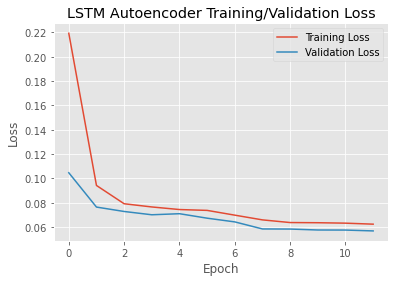

In [0]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("LSTM Autoencoder Training/Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

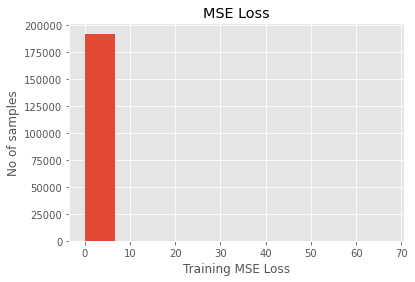

In [0]:
# MSE loss
XX_pred = model2.predict(XX)
train_mse_loss = np.mean(np.power(XX_pred - yy,2), axis=1)
train_mse_loss = train_mse_loss.reshape((-1))

plt.hist(train_mse_loss, bins=10)
plt.title("MSE Loss")
plt.xlabel("Training MSE Loss")
plt.ylabel("No of samples")
plt.show()

## Testing

In [0]:
# Create new model:
first_layer = hyperopt.space_eval(space, best_hyperparam)["dense_l1"]
second_layer = hyperopt.space_eval(space, best_hyperparam)["dense_l2"]
learning_rate = hyperopt.space_eval(space, best_hyperparam)["learning_rate"]
optimizer = hyperopt.space_eval(space, best_hyperparam)["optimizer"]


In [0]:
A, l = generate_all_testing(tsf)

Number of 1s: 84
This number should be very close to the number of 1s in tsf_labeled

In [0]:
def mse_sum(mse):
    mse_sum=[]
    for i in range(0,mse.shape[0]):
        mse_sum.append(np.sum(mse[i]))
    len(mse_sum)
    return mse_sum

In [0]:
A_pred = model2.predict(A)
mse = np.mean(np.power(A - A_pred, 2), axis=1)
ms = mse_sum(mse)
error_df_test = pd.DataFrame({'Reconstruction_error': ms,'True_class': l})
error_df_test = error_df_test.reset_index()

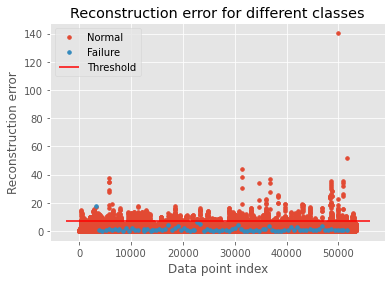

In [0]:
threshold_fixed = 7
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Failure" if name == 1 else "Normal")
    
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

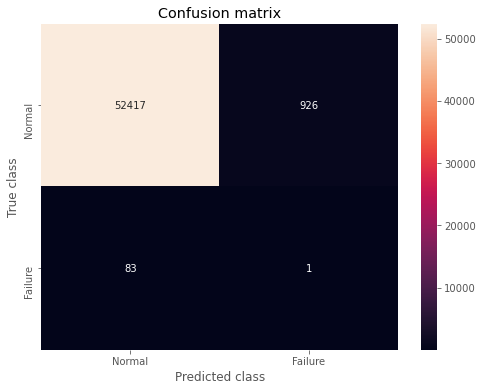

In [0]:
classes = ['Normal','Failure']
y_pred = [1 if e > threshold_fixed else 0 for e in error_df_test.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df_test.True_class, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [0]:
print('\nClassification Report:')
print(classification_report(error_df_test.True_class, y_pred))
print('\nF1 Score:')
print(f1_score(error_df_test.True_class, y_pred, average = None))

Classification Report:
 precision recall f1-score support

 0 1.00 0.98 0.99 53343
 1 0.00 0.01 0.00 84

 accuracy 0.98 53427
 macro avg 0.50 0.50 0.50 53427
weighted avg 1.00 0.98 0.99 53427


F1 Score:
[0.99046701 0.00197824]

## Testing with new dataset

In [0]:
print(hyperopt.space_eval(space50, best_hyperparam50))

{'dropout': 0.07031539323259835, 'epochs': 55.0, 'learning_rate': 0.08271996530819141, 'lstm_l1': 32.0, 'lstm_l2': 10.0, 'optimizer': 'Adadelta', 'window_size': 10.0}

In [0]:
# Create new model
first_layer = int(hyperopt.space_eval(space50, best_hyperparam50)["lstm_l1"])
second_layer = int(hyperopt.space_eval(space50, best_hyperparam50)["lstm_l2"])
window_size = int(hyperopt.space_eval(space50, best_hyperparam50)["window_size"])
epochs = int(hyperopt.space_eval(space50, best_hyperparam50)["epochs"])
learning_rate = hyperopt.space_eval(space50, best_hyperparam50)["learning_rate"]
dropout = hyperopt.space_eval(space50, best_hyperparam50)["dropout"]
optimizer = hyperopt.space_eval(space50, best_hyperparam50)["optimizer"]

In [0]:
optimizer_call = getattr(tensorflow.keras.optimizers, optimizer)
optimizer = optimizer_call(learning_rate=learning_rate)

In [0]:
X50, y50, XX50, yy50 = generate_training(tsf,window_size)
train_shape = X50
X50.shape

Out[62]: (33389, 10, 21)

In [0]:
def create_new_model():
  model2 = tensorflow.keras.Sequential()
  model2.add(tensorflow.keras.layers.LSTM(int(first_layer), kernel_initializer='he_uniform', batch_input_shape=(None, train_shape.shape[1],
                                            train_shape.shape[2]), return_sequences=True, name='encoder_1'))
  model2.add(tensorflow.keras.layers.Dropout(rate=dropout))
  model2.add(tensorflow.keras.layers.LSTM(int(second_layer), kernel_initializer='he_uniform', return_sequences=False, name='encoder_2'))
  model2.add(tensorflow.keras.layers.RepeatVector(train_shape.shape[1], name='encoder_decoder_bridge'))
  model2.add(tensorflow.keras.layers.Dropout(rate=dropout))
  model2.add(tensorflow.keras.layers.LSTM(int(second_layer), kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
  model2.add(tensorflow.keras.layers.LSTM(int(first_layer), kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
  model2.add(tensorflow.keras.layers.TimeDistributed(tensorflow.keras.layers.Dense(train_shape.shape[2])))
  return model2

In [0]:
new_model = create_new_model()
  
new_model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])

In [0]:
mlflow.end_run()
mlflow.tensorflow.autolog()
with mlflow.start_run() as run:
  history = new_model.fit(X50, y50, validation_split=.2, epochs=epochs, verbose=2, callbacks=[early_stop])
  
  # Save the run information to register the model later
  kerasURI = run.info.artifact_uri
  
  # Evaluate model on test dataset and log result
  mlflow.log_param("eval_result", new_model.evaluate(XX50, yy50)[0])

Epoch 1/55
WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0283s vs `on_train_batch_end` time: 0.0754s). Check your callbacks.
835/835 - 27s - loss: 0.7842 - mse: 0.7842 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 2/55
835/835 - 18s - loss: 0.6967 - mse: 0.6967 - val_loss: 0.6861 - val_mse: 0.6861
Epoch 3/55
835/835 - 18s - loss: 0.6585 - mse: 0.6585 - val_loss: 0.6503 - val_mse: 0.6503
Epoch 4/55
835/835 - 18s - loss: 0.6264 - mse: 0.6264 - val_loss: 0.6208 - val_mse: 0.6208
Epoch 5/55
835/835 - 18s - loss: 0.6012 - mse: 0.6012 - val_loss: 0.5980 - val_mse: 0.5980
Epoch 6/55
835/835 - 18s - loss: 0.5815 - mse: 0.5815 - val_loss: 0.5793 - val_mse: 0.5793
Epoch 7/55
835/835 - 18s - loss: 0.5648 - mse: 0.5648 - val_loss: 0.5637 - val_mse: 0.5637
Epoch 8/55
835/835 - 18s - loss: 0.5506 - mse: 0.5506 - val_loss: 0.5503 - val_mse: 0.5503
Epoch 9/55
835/835 - 18s - loss: 0.5382 - mse: 0.5382 - val_loss: 0.5384 - val_mse: 0.5384
Epoch 10/55
835/835 - 18s - loss: 0.5274 - mse: 0.5274 - val_loss: 0.5276 - val_mse: 0.5276
Epoch 11/55
835/835 - 18s - loss: 0.5174 - mse: 0.5174 - val_loss: 0.5180 - val_mse: 0.5180
Epoch 12/55
835/835 - 18s - loss: 0.5086 - mse: 0.5086 - val_loss: 0.5089 - val_mse: 0.5089
Epoch 13/55
835/835 - 18s - loss: 0.4998 - mse: 0.4998 - val_loss: 0.5004 - val_mse: 0.5004
Epoch 14/55
835/835 - 18s - loss: 0.4918 - mse: 0.4918 - val_loss: 0.4922 - val_mse: 0.4922
Epoch 15/55
835/835 - 18s - loss: 0.4839 - mse: 0.4839 - val_loss: 0.4848 - val_mse: 0.4848
Epoch 16/55
835/835 - 18s - loss: 0.4774 - mse: 0.4774 - val_loss: 0.4781 - val_mse: 0.4781
Epoch 17/55
835/835 - 18s - loss: 0.4712 - mse: 0.4712 - val_loss: 0.4717 - val_mse: 0.4717
Epoch 18/55
835/835 - 18s - loss: 0.4653 - mse: 0.4653 - val_loss: 0.4659 - val_mse: 0.4659
Epoch 19/55
835/835 - 18s - loss: 0.4599 - mse: 0.4599 - val_loss: 0.4604 - val_mse: 0.4604
Epoch 20/55
835/835 - 18s - loss: 0.4547 - mse: 0.4547 - val_loss: 0.4551 - val_mse: 0.4551
Epoch 21/55
835/835 - 18s - loss: 0.4499 - mse: 0.4499 - val_loss: 0.4501 - val_mse: 0.4501
Epoch 22/55
835/835 - 18s - loss: 0.4454 - mse: 0.4454 - val_loss: 0.4454 - val_mse: 0.4454
Epoch 23/55
835/835 - 18s - loss: 0.4409 - mse: 0.4409 - val_loss: 0.4410 - val_mse: 0.4410
Epoch 24/55
835/835 - 18s - loss: 0.4369 - mse: 0.4369 - val_loss: 0.4368 - val_mse: 0.4368
Epoch 25/55
835/835 - 18s - loss: 0.4332 - mse: 0.4332 - val_loss: 0.4330 - val_mse: 0.4330
Epoch 26/55
835/835 - 18s - loss: 0.4297 - mse: 0.4297 - val_loss: 0.4294 - val_mse: 0.4294
Epoch 27/55
835/835 - 18s - loss: 0.4263 - mse: 0.4263 - val_loss: 0.4259 - val_mse: 0.4259
Epoch 28/55
835/835 - 19s - loss: 0.4233 - mse: 0.4233 - val_loss: 0.4227 - val_mse: 0.4227
Epoch 29/55
835/835 - 18s - loss: 0.4199 - mse: 0.4199 - val_loss: 0.4197 - val_mse: 0.4197
Epoch 30/55
835/835 - 18s - loss: 0.4172 - mse: 0.4172 - val_loss: 0.4169 - val_mse: 0.4169
Epoch 31/55
835/835 - 18s - loss: 0.4146 - mse: 0.4146 - val_loss: 0.4141 - val_mse: 0.4141
Epoch 32/55
835/835 - 18s - loss: 0.4122 - mse: 0.4122 - val_loss: 0.4115 - val_mse: 0.4115
Epoch 33/55
835/835 - 18s - loss: 0.4098 - mse: 0.4098 - val_loss: 0.4092 - val_mse: 0.4092
Epoch 34/55
835/835 - 18s - loss: 0.4075 - mse: 0.4075 - val_loss: 0.4067 - val_mse: 0.4067
Epoch 35/55
835/835 - 18s - loss: 0.4053 - mse: 0.4053 - val_loss: 0.4046 - val_mse: 0.4046
Epoch 36/55
835/835 - 18s - loss: 0.4029 - mse: 0.4029 - val_loss: 0.4023 - val_mse: 0.4023
Epoch 37/55
835/835 - 18s - loss: 0.4010 - mse: 0.4010 - val_loss: 0.4003 - val_mse: 0.4003
Epoch 38/55
835/835 - 18s - loss: 0.3991 - mse: 0.3991 - val_loss: 0.3985 - val_mse: 0.3985
Epoch 39/55
835/835 - 18s - loss: 0.3973 - mse: 0.3973 - val_loss: 0.3966 - val_mse: 0.3966
Epoch 40/55
835/835 - 18s - loss: 0.3957 - mse: 0.3957 - val_loss: 0.3947 - val_mse: 0.3947
Epoch 41/55
835/835 - 18s - loss: 0.3936 - mse: 0.3936 - val_loss: 0.3932 - val_mse: 0.3932
Epoch 42/55
835/835 - 18s - loss: 0.3922 - mse: 0.3922 - val_lo

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-84754> in <module> 
 8 
 9 # Evaluate model on test dataset and log result 
 ---> 10 mlflow . log_param ( "eval_result" , new_model . evaluate ( XX50 , yy ) [ 0 ] ) 

 /databricks/python/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py in evaluate (self, x, y, batch_size, verbose, sample_weight, steps, callbacks, max_queue_size, workers, use_multiprocessing, return_dict) 
 1352 else : 
 1353 # Creates a `tf.data.Dataset` and handles batch and epoch iteration. 
 -> 1354 data_handler = data_adapter.DataHandler(
 1355 x = x , 
 1356 y = y , 

 /databricks/python/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py in __init__ (self, x, y, sample_weight, batch_size, steps_per_epoch, initial_epoch, epochs, shuffle, class_weight, max_queue_size, workers, use_multiprocessing, model, steps_per_execution) 
 1098 
 1099 adapter_cls = select_data_adapter ( x , y ) 
 -> 1100 self._adapter = adapter_cls(
 1101 x , 
 1102 y , 

 /databricks/python/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py in __init__ (self, x, y, sample_weights, sample_weight_modes, batch_size, epochs, steps, shuffle, **kwargs) 
 272 
 273 num_samples = set ( int ( i . shape [ 0 ] ) for i in nest . flatten ( inputs ) ) . pop ( ) 
 --> 274 _check_data_cardinality ( inputs ) 
 275 
 276 # If batch_size is not passed but steps is, calculate from the input data. 

 /databricks/python/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py in _check_data_cardinality (data) 
 1527 label, ", ".join(str(i.shape[0]) for i in nest.flatten(single_data)))
 1528 msg += "Make sure all arrays contain the same number of samples." 
 -> 1529 raise ValueError ( msg ) 
 1530 
 1531 

 ValueError : Data cardinality is ambiguous:
 x sizes: 11130
 y sizes: 11165
Make sure all arrays contain the same number of samples.

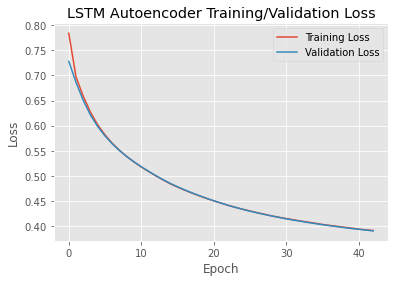

In [0]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("LSTM Autoencoder Training/Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [0]:
A50, l50 = generate_all_testing(tsf,window_size)
A50.shape

Number of 1s: 86
This number should be very close to the number of 1s in tsf_labeled
Out[69]: (58355, 10, 21)

In [0]:
A50_pred = new_model.predict(A50)
mse = np.mean(np.power(A50 - A50_pred, 2), axis=1)
ms = mse_sum(mse)
error_df_test = pd.DataFrame({'Reconstruction_error': ms,'True_class': l50})
error_df_test = error_df_test.reset_index()

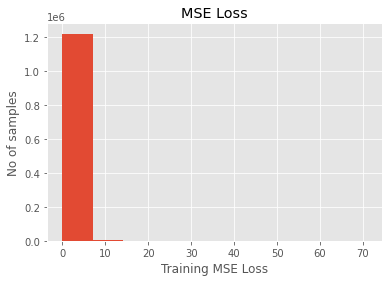

In [0]:
# MSE loss
train_mse_loss = mse.reshape((-1))

plt.hist(train_mse_loss, bins=10)
plt.title("MSE Loss")
plt.xlabel("Training MSE Loss")
plt.ylabel("No of samples")
plt.show()

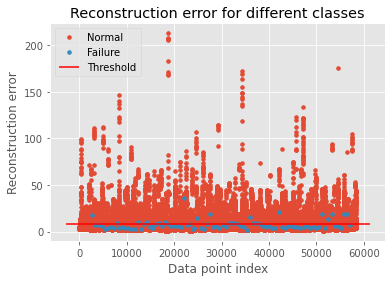

In [0]:
threshold_fixed = 8
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Failure" if name == 1 else "Normal")
    
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

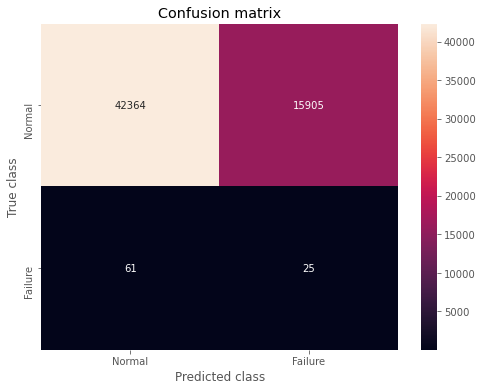

In [0]:
classes = ['Normal','Failure']
y_pred = [1 if e > threshold_fixed else 0 for e in error_df_test.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df_test.True_class, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [0]:
print('\nClassification Report:')
print(classification_report(error_df_test.True_class, y_pred))
print('\nF1 Score:')
print(f1_score(error_df_test.True_class, y_pred, average = None))

Classification Report:
 precision recall f1-score support

 0 1.00 0.73 0.84 58269
 1 0.00 0.29 0.00 86

 accuracy 0.73 58355
 macro avg 0.50 0.51 0.42 58355
weighted avg 1.00 0.73 0.84 58355


F1 Score:
[0.8414404 0.00312188]